Считываение данных

In [78]:
from collections import Counter
import math
f = open("moscow_2021.txt", "r")
data = []
for num in f:
    num = num.strip()
    if num:
        data.append(int(num))
data.sort()
sorted_data = data
print(sorted_data)
data_counter = Counter(data)
print(sorted(data_counter.items()))


[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,

In [19]:
len(data)

32423

<h3>Нахождение среднего</h3>

In [16]:
def average(data):
    average_sum = 0
    for num in data:
        average_sum += num
    average_num = average_sum/len(data)
    return average_num

print(average(data))

35.3717422817136


In [28]:
def countX(data, x):
    count = 0
    for ele in data:
        if (ele == x):
            count = count + 1
    return count

print(countX(data, 14))

49


<h3>Дисперсия</h3>

In [49]:


def variance(data):
    variance_sum = 0
    average_of_data = average(data)
    num_count = Counter(data)
    for num in data:
        
        variance_sum += ((num - average_of_data)**2)
    return ((variance_sum)/len(data))
print(variance(data))

144.9444650488288


<h3>Среднеквадратическое отклонение</h3>

In [56]:
import math
def sqrt_of_average(data):
    return math.sqrt(variance(data))
print(sqrt_of_average(data))

12.038146371631143


<h3>Мода и ее частота</h3>

In [61]:
def find_mode(data):
    counter = Counter(data)
    mode_data = counter.most_common(1)
    
    if mode_data:
        mode, frequency = mode_data[0]
        return mode, frequency
    else:
        return None, 0

print(find_mode(data))

(29, 1340)


<h3>Медиана</h3>

In [69]:
def median(data):
    if (len(data))%2==0:
        return (data[len(data)//2 - 1] + data[len(data)//2])/2
    else:
        return data[len(data)//2]
print(median(data))


34


<h3>Минимум, максимум, размах</h3>

In [70]:
def min_max_razmah(data):
    min = data[0]
    max = data[len(data)-1]
    razmah = max - min
    return min, max, razmah
print(min_max_razmah(data))

(14, 73, 59)


<h3>Ассиметрия и эксцесс</h3>

In [94]:
def u3(data):
    variance_sum = 0
    average_of_data = average(data)
    num_count = Counter(data)
    for num in data:
        
        variance_sum += ((num - average_of_data)**3)
    return ((variance_sum)/len(data))
def u4(data):
    variance_sum = 0
    average_of_data = average(data)
    num_count = Counter(data)
    for num in data:
        
        variance_sum += ((num - average_of_data)**4)
    return ((variance_sum)/len(data))

print(u3(data)/pow(sqrt_of_average(data), 3))
print(u4(data)/pow(sqrt_of_average(data), 4) -3)

0.6225379970647471
-0.060167342105650334


<h3>График</h3>


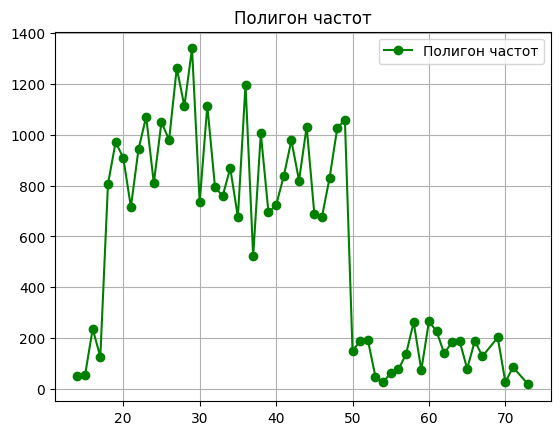

In [89]:
import matplotlib.pyplot as plt

values = list(data_counter.keys())
frequencies = list(data_counter.values())
sorted_values = sorted(data_counter.keys())

plt.plot(sorted_values, frequencies, marker='o', linestyle='-', color='green', label='Полигон частот')

plt.title('Полигон частот')
plt.grid(True)

plt.legend()
plt.show()

<h3>Правило трех сигм</h3>

In [85]:
def sigms(data):
    counter1 = 0
    counter2 = 0
    counter3 = 0
    l1 = (average(data) +sqrt_of_average(data))
    l2 = (average(data) +2*sqrt_of_average(data)) 
    l3 = (average(data) +3*sqrt_of_average(data)) 
    r1 = (average(data) -sqrt_of_average(data))
    r2 = (average(data) -2*sqrt_of_average(data)) 
    r3 = (average(data) -3*sqrt_of_average(data))
    for num in data:
        if l1>num > r1:
            counter1+=1
        if l2>num > r2:
            counter2+=1
        if l3>num > r3:
            counter3+=1
   
    return(counter1/len(data), counter2/len(data), counter3/len(data))
    
print(sigms(data))

(0.6635104709619715, 0.946704499892052, 0.9994756808438454)


<h3>Функция распределения</h3>

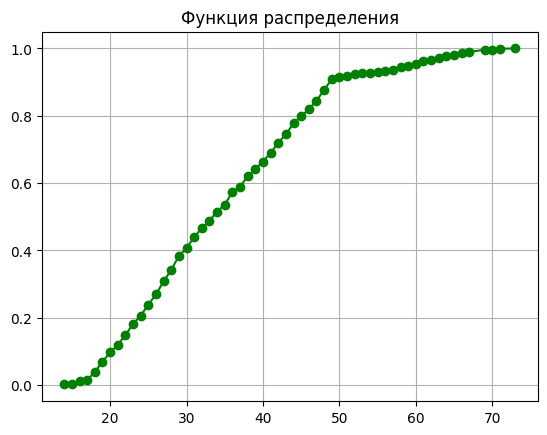

In [88]:
frequencies = [data_counter[val] for val in sorted_values]
cumulative_frequencies = []
cumulative_sum = 0
total_count = sum(frequencies)

for freq in frequencies:
    cumulative_sum += freq
    cumulative_frequencies.append(cumulative_sum / total_count)

plt.plot(sorted_values, cumulative_frequencies, marker='o', color='green')
plt.title('Функция распределения')
plt.grid(True)

plt.show()